### Load Required Packages

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import metrics
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Helper Functions

In [23]:
def extract_layer_output(model, layer_name, data):
    int_layer_op = model.get_layer(name=layer_name).output
    int_layer_model = Model(inputs=model.input, outputs=int_layer_op)
    int_layer_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return int_layer_model.predict(data)

In [24]:
def generate_df(arr, label):
    df = pd.DataFrame(arr)
    df['label'] = label
    return df

### Load Dataset

In [25]:
base_path = './real_vs_fake/real-vs-fake/'
image_gen = ImageDataGenerator(rescale=1./255.)


train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=64,
    shuffle=False,
    class_mode='binary'
)

test_flow = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=1,
    shuffle = False,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [26]:
y_test = test_flow.classes

___
### Custom CNN Model Trained with Data Augmentation

In [27]:
custom_aug_model = load_model('./models/custom_augmented_model.h5')

**Extract Intermediate Layer to get vector representation of the images**

In [28]:
int_output_cus_aug = extract_layer_output(custom_aug_model, 'global_average_pooling2d', train_flow)
int_output_cus_aug.shape

1563/1563 [==============================] - 270s 172ms/step


(100000, 512)

In [29]:
int_output_cus_aug = generate_df(int_output_cus_aug, train_flow.classes)
int_output_cus_aug.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,label
0,-0.260770,-0.502902,-0.724240,0.910828,0.133298,0.077550,0.913164,0.141137,0.340192,0.119664,...,-0.525186,0.376669,1.056303,-0.728770,0.203994,-0.225541,-0.243400,0.343431,-0.142412,0
1,-0.658866,-0.664291,-0.228858,-0.773000,0.047586,-0.791913,1.027913,0.151711,-0.430689,-0.477546,...,-0.430766,-0.878063,-0.626999,-0.455677,0.733265,-0.902479,-0.946807,0.592636,-0.799962,0
2,0.368533,-0.529742,-0.098614,-0.444158,0.181652,-0.075809,-0.215764,0.235614,0.085143,0.092785,...,0.534379,0.177038,-0.195193,-0.409605,0.070948,-0.151503,0.154660,1.008983,0.258986,0
3,-0.502604,0.136336,0.089948,-0.271292,-0.197805,-1.048912,0.175355,0.178479,0.425034,0.067330,...,-0.853925,-0.104805,-0.512609,-0.012730,0.309715,-0.193692,-0.963923,0.466153,0.123642,0
4,0.579747,0.095570,0.518820,-0.830240,-0.634882,0.620281,-0.818905,-0.350885,-0.238020,-0.130883,...,0.690915,-0.554454,-0.031081,-0.872522,-0.144424,0.162715,0.636754,0.084388,0.152006,0


In [30]:
int_output_cus_aug.tail()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,label
99995,-0.139518,-0.366728,-0.000229,-0.353689,-0.155870,0.286165,0.134520,-0.434062,-0.175903,-0.280010,...,0.538515,-0.070598,0.040283,-0.946863,-0.032920,-0.221410,0.013540,0.043591,0.156045,1
99996,-0.346986,-0.432881,-0.296478,1.804800,-0.350220,-0.139905,0.068838,-0.665937,0.810756,-0.000440,...,-0.933011,1.386686,-0.236286,1.727823,-0.306327,-0.560168,-0.490938,-0.801501,0.772829,1
99997,0.282981,0.137597,0.111233,-0.750808,-0.458074,-0.426595,-0.452735,-0.480697,-0.268587,-0.001097,...,0.393399,-0.113878,-0.825151,-0.188419,-0.452118,0.100503,0.115203,-0.564470,0.085459,1
99998,0.005117,0.062468,0.584153,-0.945025,-0.813558,-0.636825,0.281602,0.107716,-1.065409,-0.359531,...,-0.193767,-0.552136,-0.876035,-1.031864,-0.124440,-0.390206,0.093501,0.795737,-0.082003,1
99999,0.240073,-0.246423,0.474435,-0.948859,-0.533505,-0.174393,-0.133287,0.456303,-0.525775,-0.398538,...,0.716110,-0.523433,-0.827379,-0.799580,0.147389,-0.585595,-0.244590,1.171576,-0.314225,1


In [31]:
int_output_cus_aug.to_csv('./custom_augmented_model_rep.csv', index=False)

**Predictions**

In [32]:
y_pred_cus_agg = custom_aug_model.predict(test_flow)

20000/20000 [==============================] - 118s 6ms/step


**Evaluation Report**

In [33]:
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred_cus_agg))
print("AP Score:", metrics.average_precision_score(y_test, y_pred_cus_agg))
print()
print(metrics.classification_report(y_test, y_pred_cus_agg > 0.5))

ROC AUC Score: 0.95847699
AP Score: 0.9562884885233613

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     10000
           1       0.95      0.75      0.84     10000

    accuracy                           0.85     20000
   macro avg       0.87      0.85      0.85     20000
weighted avg       0.87      0.85      0.85     20000



___
### DenseNet Model Trained with Data Augmentation

In [38]:
densenet_v2 = load_model('./models/dense.h5')

TypeError: Error when deserializing class 'InputLayer' using config={'batch_shape': [None, 224, 224, 3], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_3'}.

Exception encountered: Unrecognized keyword arguments: ['batch_shape']

In [ ]:
%pip install kaggle

In [12]:
int_output_dv2 = extract_layer_output(densenet_v2, 'global_average_pooling2d', train_flow)
int_output_dv2.shape

1563/1563 [==============================] - 2311s 1s/step


(100000, 1024)

In [13]:
int_output_dv2 = generate_df(int_output_dv2, train_flow.classes)
int_output_dv2.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,0.020190,1.682509,1.907172,0.065509,0.047883,0.058160,0.053962,4.651806,0.027262,2.254687,...,0.265056,0.033765,0.074011,0.054620,0.009952,3.397449,0.165754,2.809697,0.062395,0
1,0.011369,0.730498,0.793377,0.073818,0.067463,0.073436,0.076480,2.422990,0.091725,0.947687,...,0.179166,0.042529,0.083248,0.100091,0.016335,1.395304,0.139309,1.161592,0.086520,0
2,0.023508,0.906169,0.971483,0.080473,0.084224,0.102032,0.072254,2.657640,0.158070,1.224146,...,0.136539,0.043654,0.178897,0.059088,0.045123,1.336864,0.086845,1.251987,0.060732,0
3,0.004014,1.132724,1.203819,0.101253,0.100603,0.121366,0.063575,3.199579,0.282182,1.431831,...,0.238407,0.057544,0.060059,0.101128,0.013911,1.944328,0.182242,1.644371,0.086528,0
4,0.000000,1.074814,1.113242,0.041244,0.038173,0.061449,0.003548,3.307376,0.185659,1.452745,...,0.139749,0.073494,0.163624,0.064678,0.043402,1.390901,0.064848,1.167047,0.088144,0


In [14]:
int_output_dv2.tail()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
99995,0.003640,2.641359,2.922842,0.054493,0.057300,0.065556,0.050014,6.490409,0.081530,3.278553,...,0.173787,0.040298,0.079108,0.049320,0.015503,4.378191,0.098200,4.074495,0.057782,1
99996,0.002603,2.767887,3.118129,0.024741,0.021935,0.032512,0.027256,6.870457,0.006297,3.590547,...,0.216500,0.000000,0.047843,0.004106,0.042041,4.452423,0.066398,3.681836,0.000000,1
99997,0.007428,2.082525,2.324739,0.054759,0.062741,0.068741,0.058017,5.350138,0.117909,2.763652,...,0.160755,0.021357,0.068890,0.033859,0.044250,3.425482,0.070750,2.707340,0.026477,1
99998,0.000000,6.306060,7.162438,0.008853,0.009667,0.014158,0.009557,15.438575,0.023541,8.592933,...,0.007273,0.000000,0.042783,0.000000,0.000000,10.927193,0.000000,7.869710,0.000000,1
99999,0.000000,1.347743,1.431786,0.041045,0.038774,0.065271,0.006347,4.015383,0.216627,1.775044,...,0.199015,0.054710,0.092019,0.086974,0.022409,2.432522,0.154930,2.005136,0.076042,1


In [16]:
int_output_dv2.to_csv('./augmented_densenet_rep.csv', index=False)

**Predictions**

In [20]:
y_pred_dv2 = densenet_v2.predict(test_flow)

20000/20000 [==============================] - 869s 43ms/step


**Evaluation Report**

In [21]:
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred_dv2))
print("AP Score:", metrics.average_precision_score(y_test, y_pred_dv2))
print()
print(metrics.classification_report(y_test, y_pred_dv2 > 0.5))

ROC AUC Score: 0.530192585
AP Score: 0.5290490637959895

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.50      1.00      0.67     10000

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.33     20000
weighted avg       0.25      0.50      0.33     20000



c:\Users\kanko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kanko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kanko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

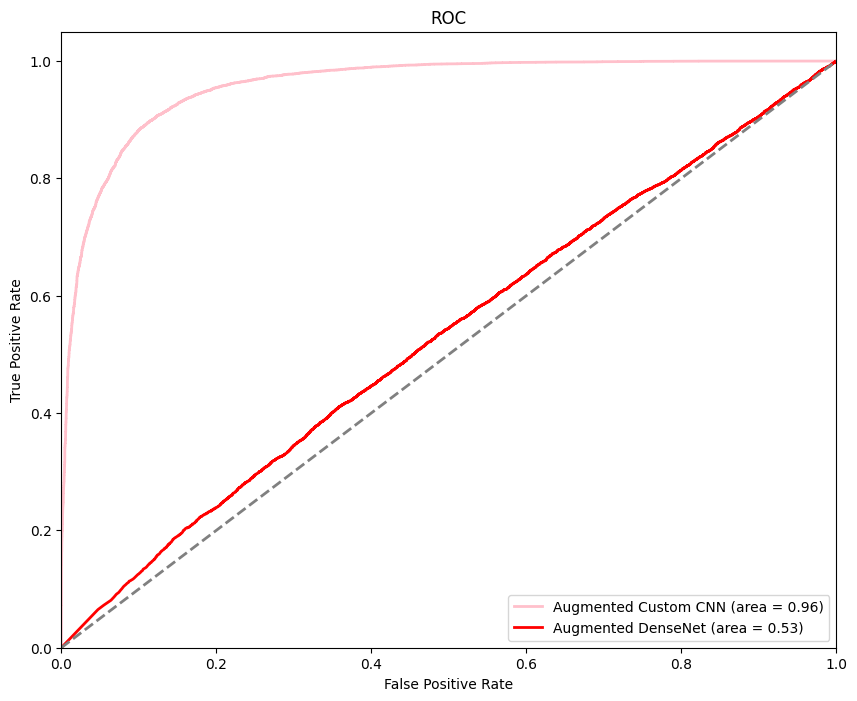

In [35]:
cus_agg_fpr, cus_agg_tpr, _ = metrics.roc_curve(y_test, y_pred_cus_agg)
cus_agg_roc_auc = metrics.auc(cus_agg_fpr, cus_agg_tpr)
dv2_fpr, dv2_tpr, _ = metrics.roc_curve(y_test, y_pred_dv2)
dv2_roc_auc = metrics.auc(dv2_fpr, dv2_tpr)
plt.figure(figsize=(10,8))

lw = 2


plt.plot(cus_agg_fpr, cus_agg_tpr, color='pink', lw=lw, label='Augmented Custom CNN (area = %0.2f)' % cus_agg_roc_auc)


plt.plot(dv2_fpr, dv2_tpr, color='red', lw=lw, label='Augmented DenseNet (area = %0.2f)' % dv2_roc_auc)


plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')


plt.xlim([0.0, 1.0])


plt.ylim([0.0, 1.05])


plt.xlabel('False Positive Rate')


plt.ylabel('True Positive Rate')


plt.title('ROC')


plt.legend(loc="lower right")


plt.show()